## importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sb
import plotly.graph_objs as go
import plotly.offline as pyo
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv('airbnb_listings.csv')

df.head()

Unnamed: 0       id                           listing_url       scrape_id  \
0           0   241032   https://www.airbnb.com/rooms/241032  20160104002432   
1           1   953595   https://www.airbnb.com/rooms/953595  20160104002432   
2           2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   
3           3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   
4           4   278830   https://www.airbnb.com/rooms/278830  20160104002432   

  last_scraped                                 name  \
0   2016-01-04         Stylish Queen Anne Apartment   
1   2016-01-04   Bright & Airy Queen Anne Apartment   
2   2016-01-04  New Modern House-Amazing water view   
3   2016-01-04                   Queen Anne Chateau   
4   2016-01-04       Charming craftsman 3 bdm house   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   
3  A charming apartment that sits atop Queen Anne...                none   
4  Cozy family craftman house in beautiful neighb...                none   

                                         picture_url   host_id  ...  \
0  https://a1.muscache.com/ac/pictures/67560560/c...    956883  ...   
1  https://a0.muscache.com/ac/pictures/14409893/f...   5177328  ...   
2  https://a2.muscache.com/ac/pictures/b4324e0f-a...  16708587  ...   
3  https://a0.muscache.com/ac/pictures/94146944/6...   9851441  ...   
4  https://a1.muscache.com/ac/pictures/6120468/b0...   1452570  ...   

  calendar_last_scraped number_of_reviews review_scores_rating  \
0            2016-01-04               207                 95.0   
1            2016-01-04                43                 96.0   
2            2016-01-04                20                 97.0   
3            2016-01-04                 0                  0.0   
4            2016-01-04                38                 92.0   

  requires_license jurisdiction_names instant_bookable cancellation_policy  \
0                f         WASHINGTON                f            moderate   
1                f         WASHINGTON                f              strict   
2                f         WASHINGTON                f              strict   
3                f         WASHINGTON                f            flexible   
4                f         WASHINGTON                f              strict   

  require_guest_profile_picture require_guest_phone_verification  \
0                             f                                f   
1                             t                                t   
2                             f                                f   
3                             f                                f   
4                             f                                f   

  calculated_host_listings_count  
0                              2  
1                              6  
2                              2  
3                              1  
4                              1  

[5 rows x 54 columns]

In [116]:
df['id'].nunique()

3401

In [117]:
len(df)

3401

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401 entries, 0 to 3400
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        3401 non-null   int64  
 1   id                                3401 non-null   int64  
 2   listing_url                       3401 non-null   object 
 3   scrape_id                         3401 non-null   int64  
 4   last_scraped                      3401 non-null   object 
 5   name                              3401 non-null   object 
 6   description                       3401 non-null   object 
 7   experiences_offered               3401 non-null   object 
 8   picture_url                       3401 non-null   object 
 9   host_id                           3401 non-null   int64  
 10  host_url                          3401 non-null   object 
 11  host_verifications                3401 non-null   object 
 12  street

In [119]:
df.columns

Index(['Unnamed: 0', 'id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'description', 'experiences_offered', 'picture_url', 'host_id',
       'host_url', 'host_verifications', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city',
       'state', 'market', 'smart_location', 'country_code', 'country',
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'review_scores_rating', 'requires_license',
       'jurisdiction_names', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
    

## To examin the relation between the price and other features


In [178]:
features_response = ['price','accommodates','bathrooms','bedrooms','beds','guests_included','review_scores_rating','calculated_host_listings_count']


In [179]:
corr = df[features_response].corr()
corr

price  accommodates  bathrooms  bedrooms  \
price                           1.000000      0.645140   0.512414  0.627678   
accommodates                    0.645140      1.000000   0.531918  0.771022   
bathrooms                       0.512414      0.531918   1.000000  0.607962   
bedrooms                        0.627678      0.771022   0.607962  1.000000   
beds                            0.582827      0.858992   0.527172  0.751107   
guests_included                 0.387392      0.531012   0.296312  0.455958   
review_scores_rating           -0.024158      0.037749  -0.001542 -0.014792   
calculated_host_listings_count -0.050940     -0.028624  -0.000714 -0.048539   

                                    beds  guests_included  \
price                           0.582827         0.387392   
accommodates                    0.858992         0.531012   
bathrooms                       0.527172         0.296312   
bedrooms                        0.751107         0.455958   
beds                            1.000000         0.453079   
guests_included                 0.453079         1.000000   
review_scores_rating            0.011979         0.040140   
calculated_host_listings_count  0.015554        -0.078592   

                                review_scores_rating  \
price                                      -0.024158   
accommodates                                0.037749   
bathrooms                                  -0.001542   
bedrooms                                   -0.014792   
beds                                        0.011979   
guests_included                             0.040140   
review_scores_rating                        1.000000   
calculated_host_listings_count             -0.024061   

                                calculated_host_listings_count  
price                                                -0.050940  
accommodates                                         -0.028624  
bathrooms                                            -0.000714  
bedrooms                                             -0.048539  
beds                                                  0.015554  
guests_included                                      -0.078592  
review_scores_rating                                 -0.024061  
calculated_host_listings_count                        1.000000

<AxesSubplot:>

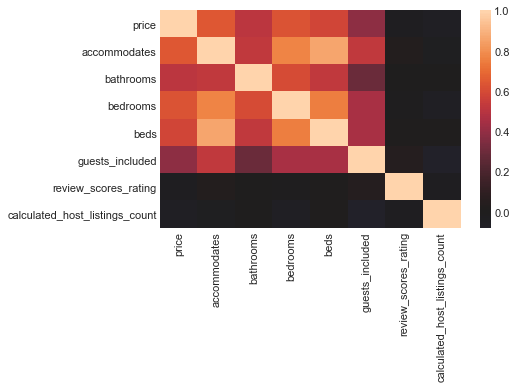

In [180]:
sb.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values, center = 0)

In [167]:
df['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    713
Capitol Hill           510
Downtown               472
Central Area           332
Queen Anne             266
Ballard                211
West Seattle           171
Rainier Valley         142
University District    107
Beacon Hill             95
Cascade                 75
Northgate               71
Delridge                71
Lake City               59
Magnolia                53
Seward Park             44
Interbay                 9
Name: neighbourhood_group_cleansed, dtype: int64

In [124]:
df.shape

(3401, 54)

## to find the top 10 hosts with higher number of listings in seattle

In [172]:
top_host = df['host_id'].value_counts().head(10)

Text(0.5, 1.0, 'Top 10 host with the most number of listings in Seattle')

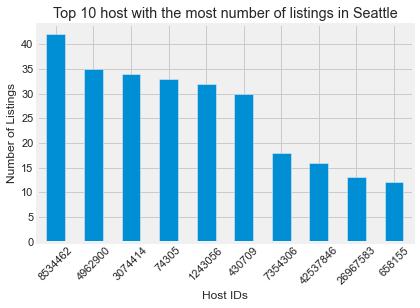

In [173]:
top_host.plot.bar(legend = False, rot = 45)
plt.xlabel('Host IDs')
plt.ylabel('Number of Listings')
plt.title('Top 10 host with the most number of listings in Seattle')

## to find neighborhoods with the highest number of listings in Seattle

In [5]:
neighbourhood = df['neighbourhood_group_cleansed'].value_counts()
neighbourhood = neighbourhood.drop(['Other neighborhoods'])
neighbourhood

Capitol Hill           510
Downtown               472
Central Area           332
Queen Anne             266
Ballard                211
West Seattle           171
Rainier Valley         142
University District    107
Beacon Hill             95
Cascade                 75
Delridge                71
Northgate               71
Lake City               59
Magnolia                53
Seward Park             44
Interbay                 9
Name: neighbourhood_group_cleansed, dtype: int64

Text(0.5, 1.0, 'Top 10 neighbourhood with the highest number of listings in Seattle')

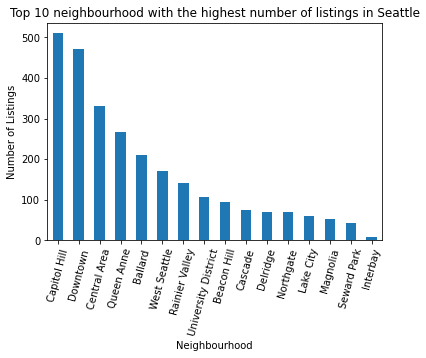

In [6]:
neighbourhood.plot.bar(legend = False, rot = 75)
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.title('Top 10 neighbourhood with the highest number of listings in Seattle')

## to find the count of different property types in the top three neighborhoods


In [8]:
top_3 = neighbourhood.index[:3].tolist()
top_3

['Capitol Hill', 'Downtown', 'Central Area']

In [10]:
bar_df = pd.DataFrame(df.loc[df['neighbourhood_group_cleansed'].isin(top_3) ].groupby(['neighbourhood_group_cleansed', 'property_type']).count()['id']).reset_index()
property_list = bar_df.property_type.unique().tolist()

bar_data = []

for property_type in property_list:
        bar = go.Bar(name = property_type, x= top_3, y =bar_df[bar_df['property_type']== property_type]['id'].tolist())
        bar_data.append(bar)
        
bar_layout = go.Layout(title = 'Property Type Count in Top 3 Most Neighborhoods with higher number of listings',
                   barmode = 'stack',
                  yaxis = dict(title='Count'))    
    
bar_fig = go.Figure(data=bar_data, layout=bar_layout)

bar_fig.show()

In [156]:
df['neighbourhood_group_cleansed'].value_counts()


Other neighborhoods    713
Capitol Hill           510
Downtown               472
Central Area           332
Queen Anne             266
Ballard                211
West Seattle           171
Rainier Valley         142
University District    107
Beacon Hill             95
Cascade                 75
Northgate               71
Delridge                71
Lake City               59
Magnolia                53
Seward Park             44
Interbay                 9
Name: neighbourhood_group_cleansed, dtype: int64

In [158]:
coord =df.loc[:,['longitude','latitude']]
coord.describe() 

longitude     latitude
count  3401.000000  3401.000000
mean   -122.332890    47.629388
std       0.031683     0.042792
min    -122.417219    47.505088
25%    -122.354343    47.609798
50%    -122.328863    47.623883
75%    -122.310483    47.663040
max    -122.252230    47.733358

## to find distripution of listings in the different neighborhoods

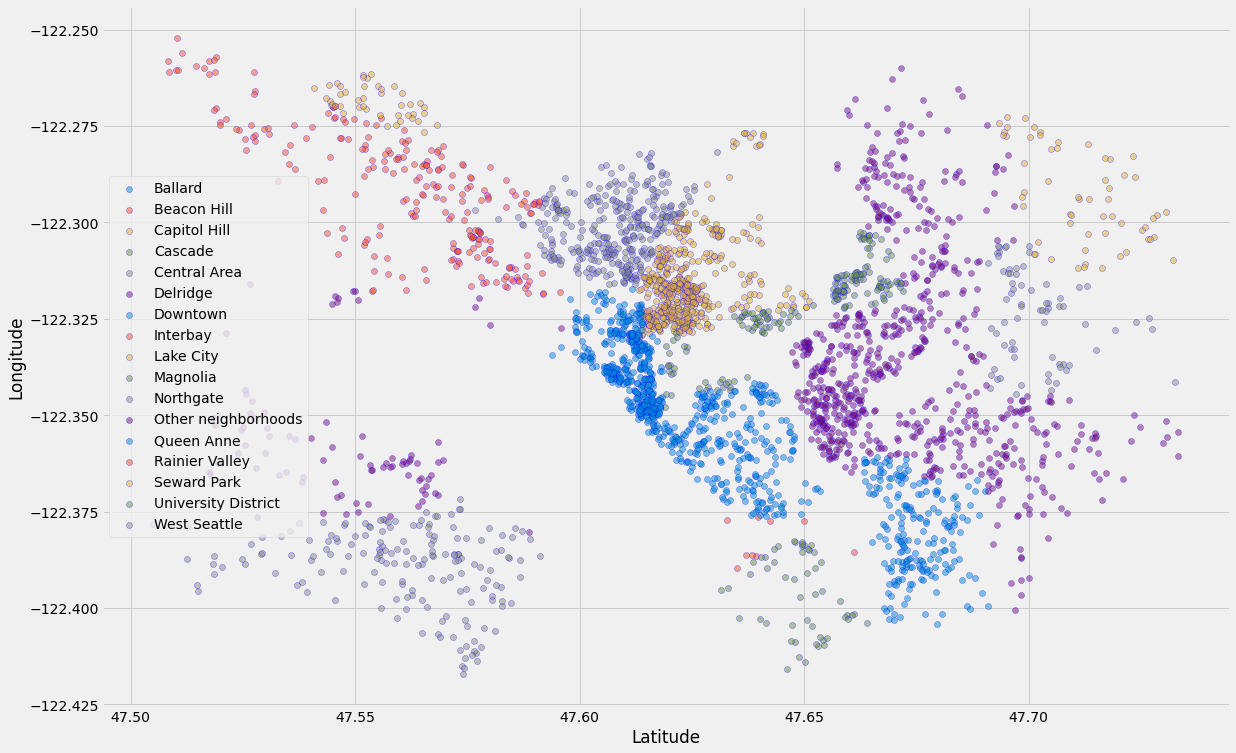

In [13]:
range_ = np.random.RandomState(0)
colors = range_.rand(17)
plt.figure(figsize=(18,12))
plt.style.use('fivethirtyeight')
BBox = (47.505088, 47.733358,-122.417219, -122.252230)
neighborhood_groups = df.groupby('neighbourhood_group_cleansed')
for name,neighborhood_group in neighborhood_groups :
    plt.scatter(neighborhood_group['latitude'],neighborhood_group['longitude'],label=name,alpha=0.5, edgecolors='b')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()

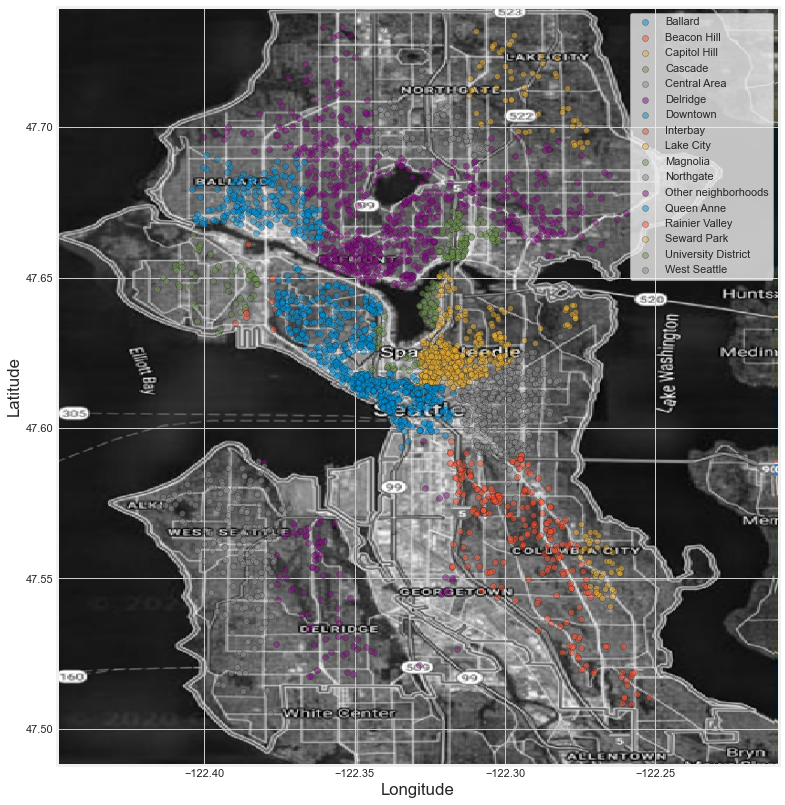

In [18]:
plt.figure(figsize=(28,13))
plt.style.use('fivethirtyeight')
BBox = (-122.448899, -122.20900, 47.487889, 47.73999)
sg_map = plt.imread('seattle_map.png')
plt.imshow(sg_map,zorder=0,extent=BBox)
ax = plt.gca
groups = df.groupby('neighbourhood_group_cleansed')
for name,group in groups :
    plt.scatter(group['longitude'],group['latitude'],label=name,alpha=0.5, edgecolors='k')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()


## Heatmap of Seattle showing the distripbution of listings

In [160]:
import folium
from folium.plugins import HeatMap
map_folium = folium.Map([47.629382,-122.333180],zoom_start=11.4)
HeatMap(df[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(map_folium)
display(map_folium)


## the proportion of the different property types accross Seattle

In [89]:
df['property_type'].value_counts()

House              1556
Apartment          1512
Townhouse           106
Condominium          83
Bed & Breakfast      35
Loft                 34
Cabin                20
Other                16
Bungalow             12
Camper/RV             9
Boat                  6
Tent                  5
Treehouse             2
Chalet                2
Dorm                  2
Yurt                  1
Name: property_type, dtype: int64

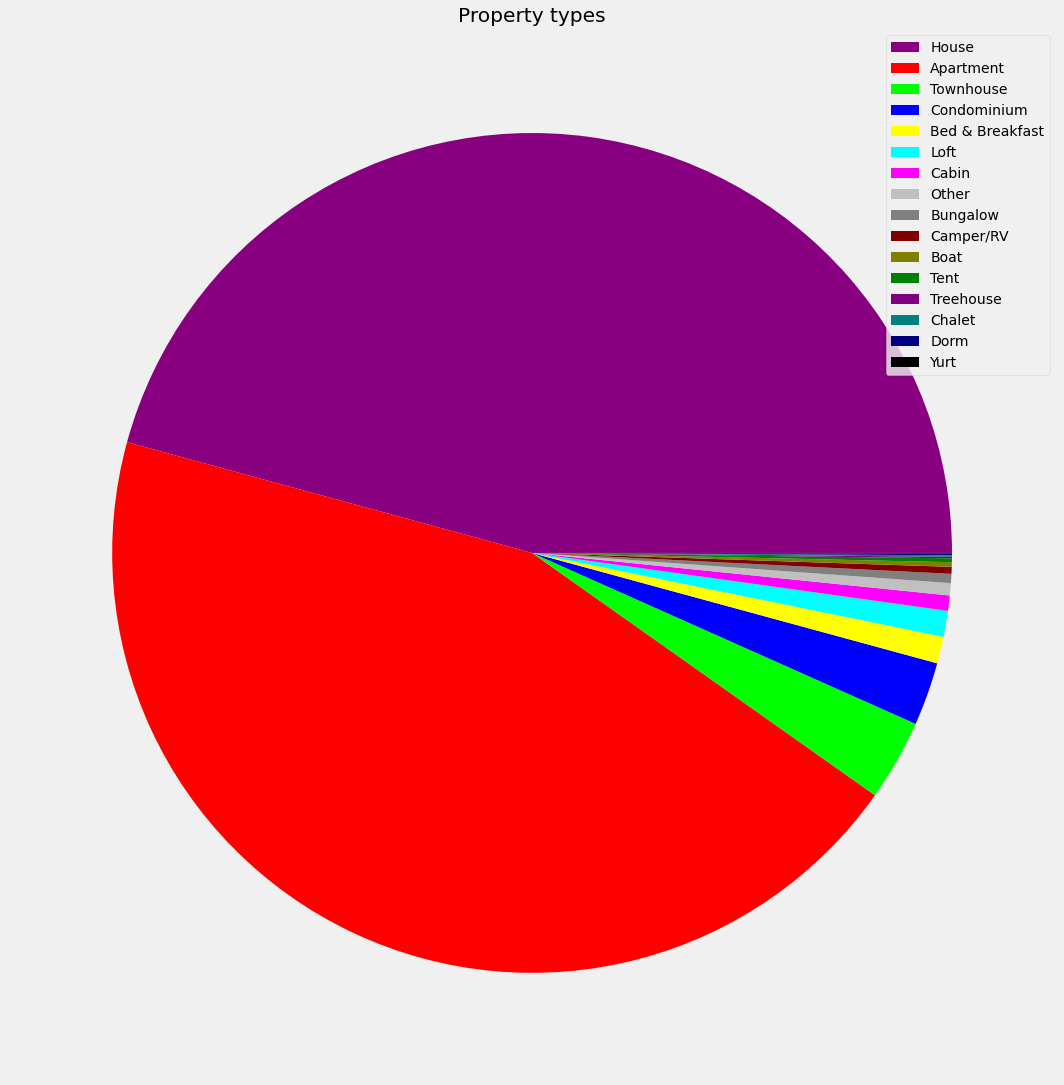

In [90]:
labels = df.property_type.value_counts().index
colors = ['#880080', '#ff0000','#00ff00','#0000ff','#ffff00','#00ffff','#ff00ff','#c0c0c0','#808080','#800000','#808000','#008000','#800080','#008080','#000080','#000000']
explode = (0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
shape = df.property_type.value_counts().values
plt.figure(figsize=(18,18))
plt.pie(shape, colors= colors, startangle=0)
plt.legend(labels)
plt.title('Property types')
plt.show()

In [91]:
df.property_type.value_counts().values

array([1556, 1512,  106,   83,   35,   34,   20,   16,   12,    9,    6,
          5,    2,    2,    2,    1], dtype=int64)

In [14]:
df.property_type.value_counts().index

Index(['House', 'Apartment', 'Townhouse', 'Condominium', 'Bed & Breakfast',
       'Loft', 'Cabin', 'Other', 'Bungalow', 'Camper/RV', 'Boat', 'Tent',
       'Treehouse', 'Chalet', 'Dorm', 'Yurt'],
      dtype='object')

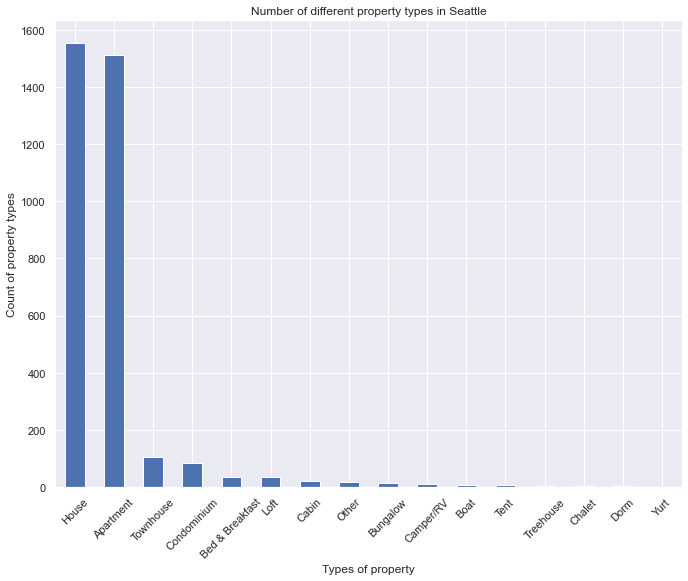

In [15]:
property_= df['property_type'].value_counts()
sb.set(rc={'figure.figsize':(10,8)})
viz_bar = property_.plot(kind='bar')
viz_bar.set_title('Number of different property types in Seattle')
viz_bar.set_xlabel('Types of property')
viz_bar.set_ylabel('Count of property types')
viz_bar.set_xticklabels(viz_bar.get_xticklabels(), rotation=45);

## Average rating score of listing in different neighborhoods

<AxesSubplot:xlabel='neighbourhood_group_cleansed'>

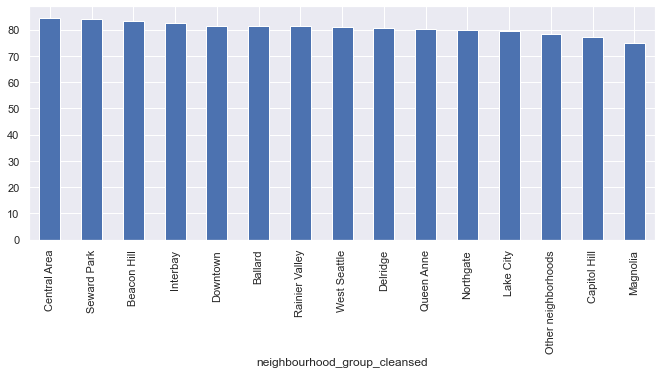

In [17]:
avgScorePerNeighborhood = df.groupby('neighbourhood_group_cleansed').agg({'review_scores_rating':np.mean})
avgScorePerNeighborhood = avgScorePerNeighborhood.apply(lambda x: x.sort_values(ascending=False).head(15))
avgScorePerNeighborhood.plot.bar(figsize=(10,4), legend = False)



In [95]:
avgScorePerNeighbourhood

review_scores_rating
neighbourhood_group_cleansed                      
Central Area                             84.623494
Seward Park                              84.227273
Beacon Hill                              83.347368
Interbay                                 82.666667
Downtown                                 81.504237
Ballard                                  81.478673
Rainier Valley                           81.394366
West Seattle                             80.842105
Delridge                                 80.788732
Queen Anne                               80.360902
Northgate                                79.830986
Lake City                                79.661017
Other neighborhoods                      78.302945
Capitol Hill                             77.088235
Magnolia                                 74.811321

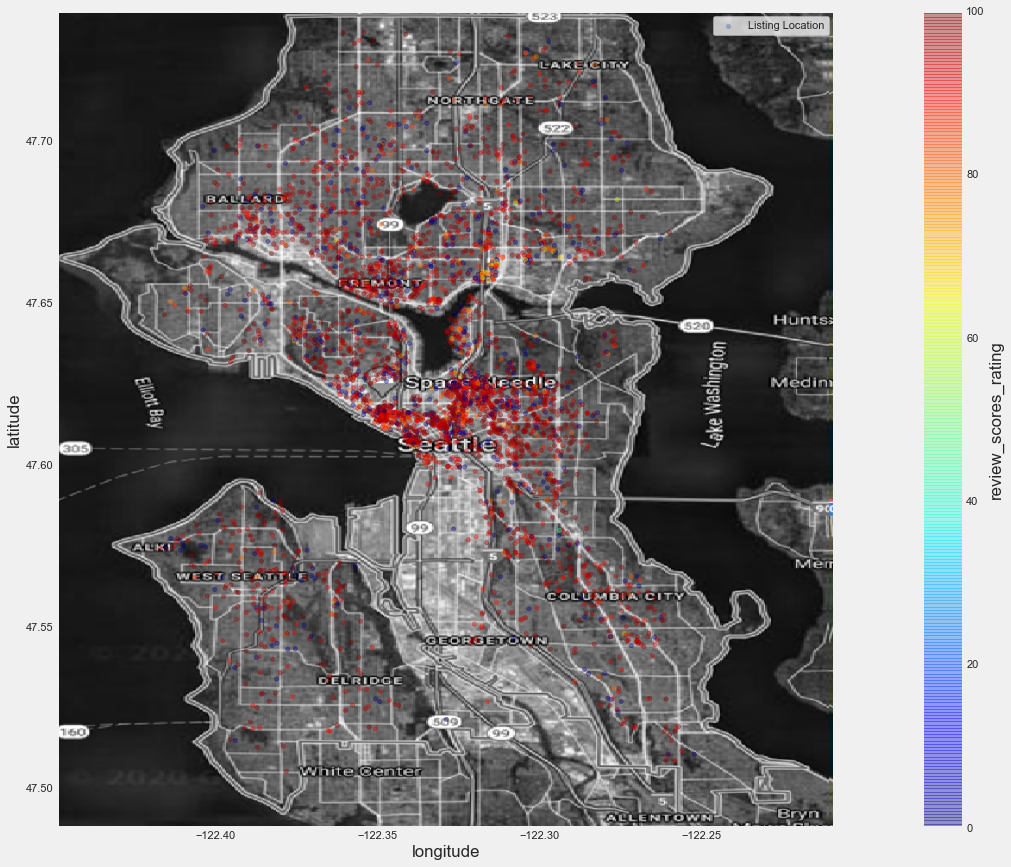

In [110]:
plt.figure(figsize=(28,14))
sg_map = plt.imread('seattle_map.png')
plt.imshow(sg_map,zorder=2,extent=BBox)
ax = plt.gca()
df.plot(kind='scatter',x='longitude',y='latitude',label='Listing Location', c='review_scores_rating', ax=ax, cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()

## map showing the price of listings in the different neighborhoods in Seattle

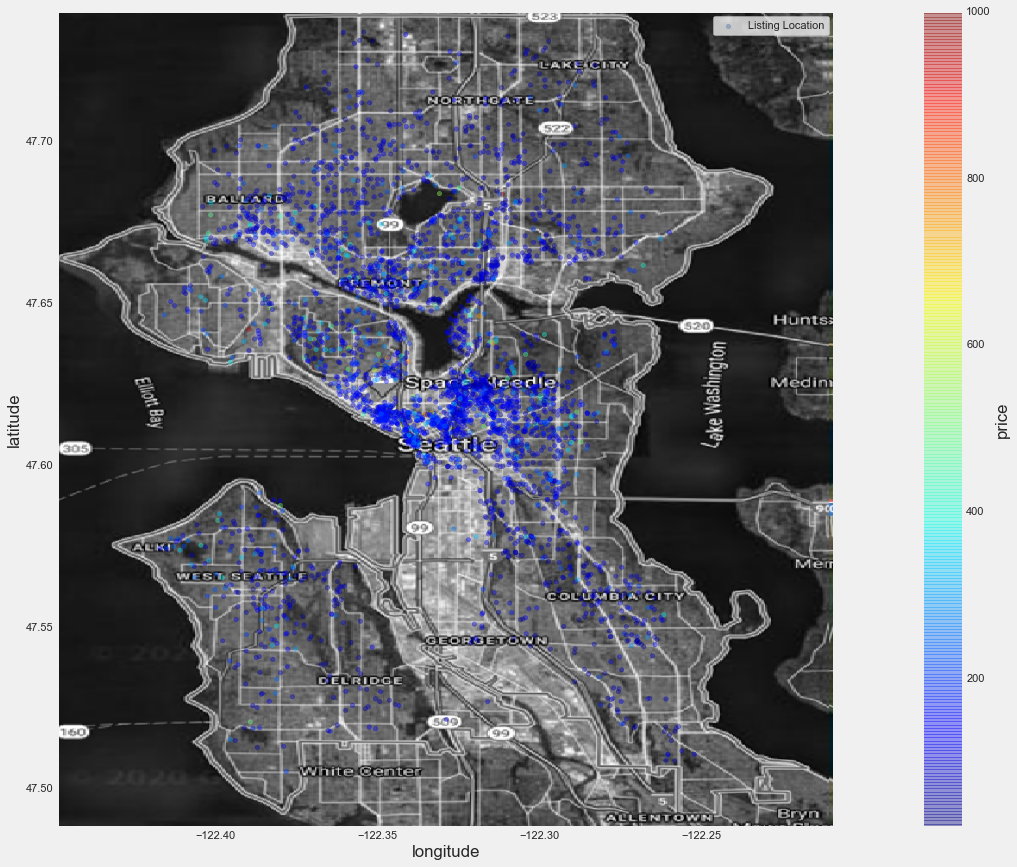

In [98]:
plt.figure(figsize=(28,14))
sg_map = plt.imread('seattle_map.png')
plt.imshow(sg_map,zorder=2,extent=BBox)
ax = plt.gca()
df.plot(kind='scatter',y='latitude',x='longitude',label='Listing Location', c='price', ax=ax, cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()

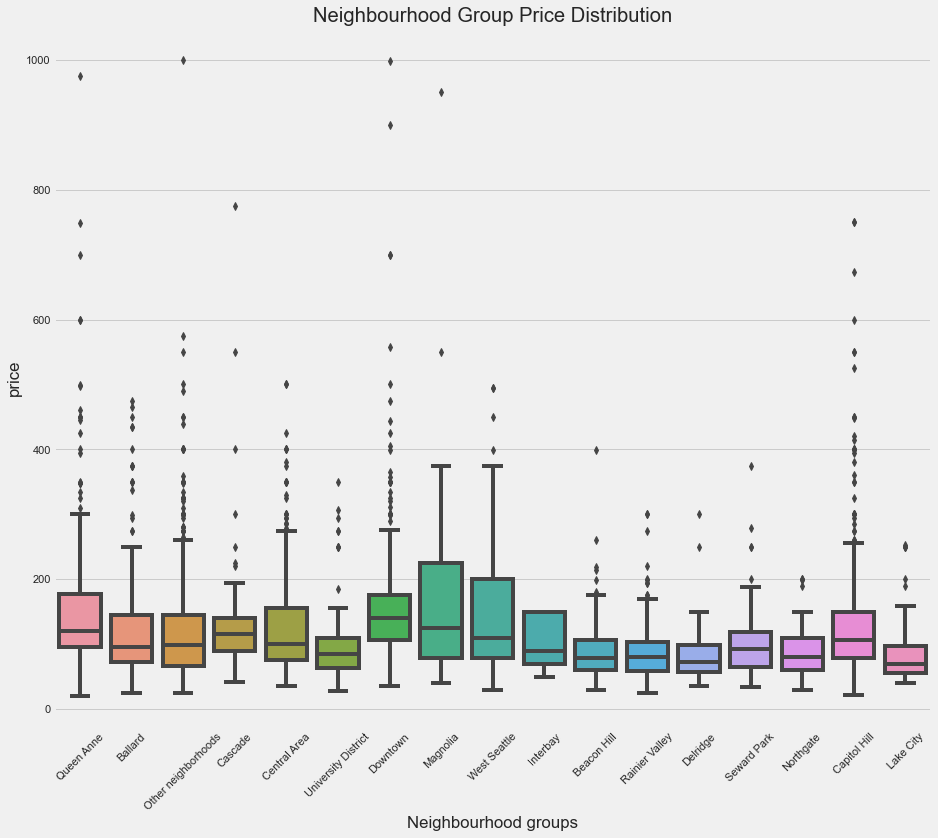

In [99]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,12))
vis = sb.boxplot(y='price',x='neighbourhood_group_cleansed',data = df)
plt.title('Neighbourhood Group Price Distribution')
plt.xlabel('Neighbourhood groups')
vis.set_xticklabels(vis.get_xticklabels(), rotation=45)
plt.show()


In [100]:
avgPricePerNeighbourhood = df.groupby('neighbourhood_group_cleansed').agg({'price':np.mean})
avgPricePerNeighbourhood = avgPricePerNeighbourhood.apply(lambda x: x.sort_values(ascending=False).head(15))
avgPricePerNeighbourhood

price
neighbourhood_group_cleansed            
Magnolia                      178.113208
Queen Anne                    160.951128
Downtown                      156.866525
West Seattle                  144.321637
Cascade                       138.200000
Capitol Hill                  131.866667
Central Area                  129.569277
Ballard                       125.028436
Other neighborhoods           120.718093
Seward Park                   108.477273
University District            98.299065
Interbay                       98.000000
Beacon Hill                    93.705263
Lake City                      90.949153
Northgate                      90.929577

## Word cloud of customers reviews of Seattle listings

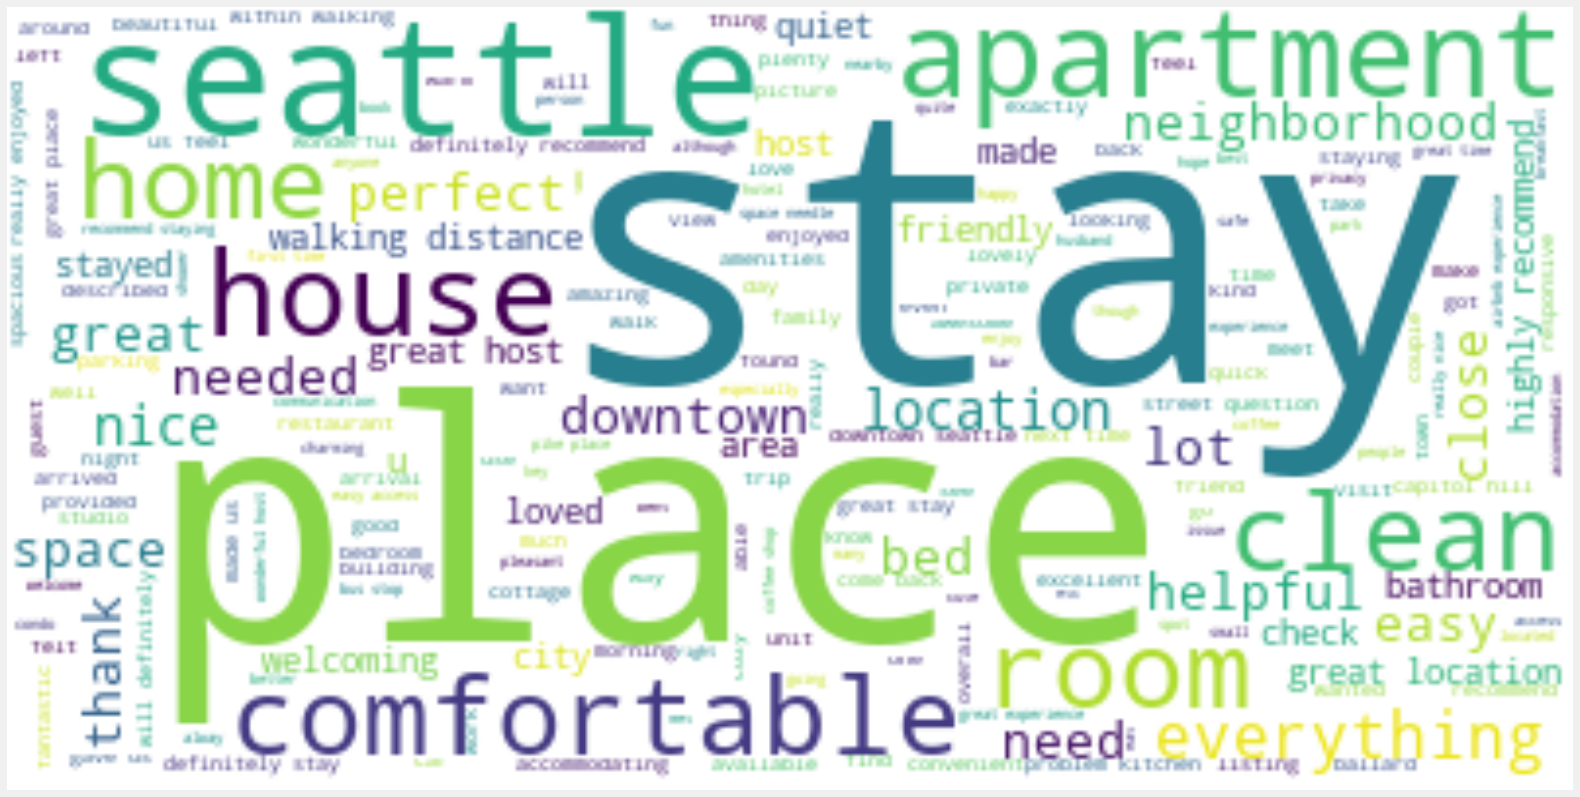

In [109]:
df_review = pd.read_csv('reviews.csv')
from wordcloud import WordCloud, ImageColorGenerator
text = ' '.join(str(n).lower() for n in df_review.comments)
word_cloud = WordCloud(max_words=200, background_color = 'white').generate(text)
plt.figure(figsize=(25,20))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()